# Init

In [97]:
import os
import cv2
import math
import time
import cmath
import random
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
from numpy import unravel_index

In [98]:
class Image:
    def __init__(self):
        self.img=""
    def read_local_img(self,path,val=0):
        self.img = cv2.imread(path)
        if(val==0):
            self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def bgr_to_rgb(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def grayscale(self):
        self.img = cv2.imread(self.img, cmap="gray")
    def print_img(self,fig_size=[0,0],axis_bool=False):
        if fig_size != [0,0]:
            plt.figure(figsize = [fig_size[0],fig_size[1]])
        plt.imshow(self.img)
        if(axis_bool==False):
            plt.axis('off')
        plt.show()
        
class Subplot:
    def __init__(self):
        self.x=1
        self.y=1
        self.fig=[16,16]
        self.arr=1
        self.tot=1
        self.tit=[]

    def print_img_subplot(self,x,y,fi,tot,arr,tit,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        self.tit=tit
        fig = plt.figure(figsize=(self.fig[0],self.fig[0]))
        for i in range(0,self.tot):
            ax = fig.add_subplot(self.x,self.y,1+i)
            ax.imshow(arr[i],cmap='gray')
            ax.title.set_text(self.tit[i])
            if(axis_bool==False):
                ax.axis('off')

    def print_img_subplot2(self,x,y,fi,tot,arr,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        f, axarr = plt.subplots(x,y)
        for i in range(0,tot):
            axarr[i//x,i%y].imshow(arr[i])

def bilateral_filter(img,a,b,c):
    return cv2.bilateralFilter(img,a,b,c)

def cmp(img1,img2):
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if(img1[i][j]!=img2[i][j]):
                return False
    return True


In [99]:
def layered_img(img):
    layere1=np.zeros((img.shape[0],img.shape[1],3)).astype(np.uint8)
    layere2=np.zeros((img.shape[0],img.shape[1],3)).astype(np.uint8)
    layere3=np.zeros((img.shape[0],img.shape[1],3)).astype(np.uint8)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            layere1[i][j][0]=img[i][j][0]
            layere2[i][j][1]=img[i][j][1]
            layere3[i][j][2]=img[i][j][2]
    return layere1,layere2,layere3

def delayer_img(l1,l2,l3):
    arr=np.zeros((l1.shape[0],l1.shape[1],3)).astype(np.uint8)
    for i in range(0,l1.shape[0]):
        for j in range(0,l2.shape[1]):
            arr[i][j][0]=l1[i][j]
            arr[i][j][1]=l2[i][j]
            arr[i][j][2]=l3[i][j]
    return arr.astype(np.uint8)


In [100]:
def Rpad(img):
    arr=np.zeros((img.shape[0],img.shape[1],3)).astype(np.uint8)
    arr[:,:,0]=img
    return arr

def Gpad(img):
    arr=np.zeros((img.shape[0],img.shape[1],3)).astype(np.uint8)
    arr[:,:,1]=img
    return arr

def Bpad(img):
    arr=np.zeros((img.shape[0],img.shape[1],3)).astype(np.uint8)
    arr[:,:,2]=img
    return arr

In [101]:
def erossion(img,k,fil,aaa):
    kk=k//2
    if fil==-1:
        img=np.array(img)
        fil=np.zeros((k,k))
        fil.fill(1)
        fil=fil.astype(int)
    else:
        fil=aaa
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            arr[i][j]=img[i][j]
    for i in range(kk, img.shape[0]-kk):
        for j in range(kk,img.shape[1]-kk):
            arr1= img[i-kk:i+kk+1, j-kk:j+kk+1]
            arr1= arr1*fil
            arr[i,j]= np.min(arr1)
    return arr

def dilation(img,k,fil,aaa):
    kk=k//2
    if fil==-1:
        img=np.array(img)
        fil=np.zeros((k,k))
        fil.fill(1)
        fil=fil.astype(int)
    else:
        fil=aaa
    arr=np.zeros((img.shape[0],img.shape[1]))
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            arr[i][j]=img[i][j]
    for i in range(kk, img.shape[0]-kk):
        for j in range(kk,img.shape[1]-kk):
            arr1= img[i-kk:i+kk+1, j-kk:j+kk+1]
            arr1= arr1*fil
            arr[i,j]= np.max(arr1)
    return arr

def opening(img,k,fil,aaa):
    img=erossion(img,k,fil,aaa)
    img=dilation(img,k,fil,aaa)
    return img

def closing(img,k,fil,aaa):
    img=dilation(img,k,fil,aaa)
    img=erossion(img,k,fil,aaa)
    return img

def morphological_gradient(img,k,fil,aaa):
    img1=dilation(img,k,fil,aaa)
    img2=erossion(img,k,fil,aaa)
    return img1-img2

In [102]:
ss=Subplot()

def my_histogram(img):
    arr=np.zeros((256))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr[img[i][j]]+=1
    return arr

def thresholding(img,lim):
    arr=np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j]>=lim):
                arr[i][j]=255
    return arr.astype(np.uint8)

In [103]:
def dft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            val=0.0
            for k in range(0,img.shape[0]):
                for l in range(0,img.shape[1]):
                    val+=img[k,l]*cmath.exp(-2j*math.pi*(k*i/img.shape[0]+l*j/img.shape[1]))
            arr[i][j]=val
    return arr

def idft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            val=0.0
            for k in range(0,img.shape[0]):
                for l in range(0,img.shape[1]):
                    val+=img[k,l]*cmath.exp(2j*math.pi*(k*i/img.shape[0]+l*j/img.shape[1]))
            arr[i][j]=val/img.shape[0]/img.shape[1]
    return arr

def erosion(img,k1,k2,i):
    return cv2.erode(img,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(k1,k2)),iterations=i)

def dilate(img,k1,k2,i):
    return cv2.dilate(img,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(k1,k2)),iterations=i)


def fft_1d_op(arr):
    N = len(arr)
    wt = cmath.exp(-2j*math.pi/N)
    if N > 1:
        arr = fft_1d_op(arr[::2]) + fft_1d_op(arr[1::2])
        for k in range(0,N//2):
            tt = arr[k]
            arr[k] = tt + (wt**k)*arr[k+N//2]
            arr[k+N//2] = tt - (wt**k)*arr[k+N//2]
    return arr

def fft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        arr[i]=fft_1d_op(img[i].tolist())
    arr=arr.transpose()
    brr=np.zeros((img.shape[1],img.shape[0]),dtype=complex)
    for i in range(img.shape[1]):
        brr[i]=fft_1d_op(arr[i].tolist())
    arr=brr.transpose()
    return arr

def sqcmp(img):
    tt= (np.sqrt(np.square(img.real)+np.square(img.imag)))
    return tt.astype(np.uint8)

def ifft_1d(arr):
    N = len(arr)
    wt = cmath.exp(2j*math.pi/N)
    if N > 1:
        arr = ifft_1d(arr[::2]) + ifft_1d(arr[1::2])
        for k in range(0,N//2):
            tt = arr[k]
            arr[k] = tt + (wt**k)*arr[k+N//2]
            arr[k+N//2] = tt - (wt**k)*arr[k+N//2]
    return arr

def ifft_1d_op(arr):
    tt=ifft_1d(arr)
    for i in range(0,len(arr)):
        tt[i]=tt[i]/len(tt)
    return tt

def ifft_2d(img):
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,img.shape[0]):
        arr[i]=ifft_1d(img[i].tolist())
    arr=arr.transpose()
    brr=np.zeros((img.shape[1],img.shape[0]),dtype=complex)
    for i in range(img.shape[1]):
        brr[i]=fft_1d_op(arr[i].tolist())
    arr=brr.transpose()
    brr=np.zeros((arr.shape[0],arr.shape[1]),dtype=complex)
    for i in range(arr.shape[0]):
        brr[arr.shape[0]-i-1]=arr[i]
    return brr


def dis(a,b,c,d):
    return math.sqrt((a-c)**2+(b-d)**2)

def dis2(a,b,c,d):
    return ((a-c)**2+(b-d)**2)

def hl_fil(d,n,m,x=-1,y=-1):
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    arr=np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            val=dis(i,j,x,y)
            if val<d:
                arr[i][j]=1
    return arr

def hh_fil(d,n,m,x=-1,y=-1):
    arr=np.zeros((n,m))
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    for i in range(0,n):
        for j in range(0,m):
            val=dis(i,j,x,y)
            if val>d:
                arr[i][j]=1
    return arr

def ghl_fil(d,n,m,x=-1,y=-1):
    arr=np.zeros((n,m))
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    arr=np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            val=math.exp(-1*dis2(i,j,x,y)/(2*d**2))
            arr[i][j]=val
    return arr

def ghh_fil(d,n,m,x=-1,y=-1):
    arr=np.zeros((n,m))
    if x==-1:
        x=n//2
    if y==-1:
        y=m//2
    arr=np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            val=math.exp(-1*dis2(i,j,x,y)/(2*d**2))
            arr[i][j]=1-val
    return arr

def fftshift(img):
    n=img.shape[0]
    m=img.shape[1]
    arr=np.zeros((img.shape[0],img.shape[1]),dtype=complex)
    for i in range(0,n):
        for j in range(0,m):
            arr[i][j]=img[(i+n//2)%n][(j+m//2)%m]
    return arr

def apply(img,fil,n,m,tit,mag=False,ret=False):
    img=cv2.resize(img,(n,m))
    img=fftshift(fft_2d(img))
    if mag==True:
        magnitude_spectrum = 20 * np.log(cv2.magnitude(img.real, img.imag)+1)
        if ret==False:
            plt.imshow(magnitude_spectrum,cmap='gray')
            plt.title(tit)
            plt.show()
    return img,magnitude_spectrum
    img.real=img.real*fil
    img.imag=img.imag*fil
    if mag==True:
        magnitude_spectrum2 = 20 * np.log(cv2.magnitude(img.real, img.imag)+1)
        if ret==False:
            plt.imshow(magnitude_spectrum2,cmap='gray')
            plt.show()
    img=ifft_2d(fftshift(img))
    img.real=img.real/img.real.max()
    img.imag=img.imag/img.imag.max()
    img=(img.real**2+img.imag**2)**0.5
    if ret==True:
        return img.real,magnitude_spectrum,magnitude_spectrum2
    else :
        return img.real


In [104]:
def sfiff_2d(img):
    img=ifft_2d(fftshift(img))
    img.real=img.real/img.real.max()
    img.imag=img.imag/img.imag.max()
    img=(img.real**2+img.imag**2)**0.5
    return img.real

# Question 4

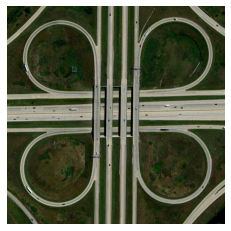

In [105]:
roads=Image()
roads.read_local_img('../images/roads.jpg')
roads.print_img()
roads_in=np.copy(roads.img)

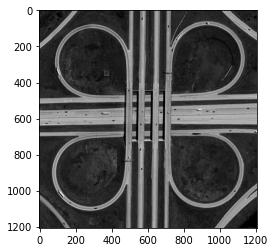

In [106]:
roads.img=cv2.cvtColor(roads.img,cv2.COLOR_BGR2GRAY)
plt.imshow(roads.img,cmap="gray")

plt.show()
arr=my_histogram(roads.img)
arr=pd.DataFrame(arr)
fig = px.line(arr)
fig.show()


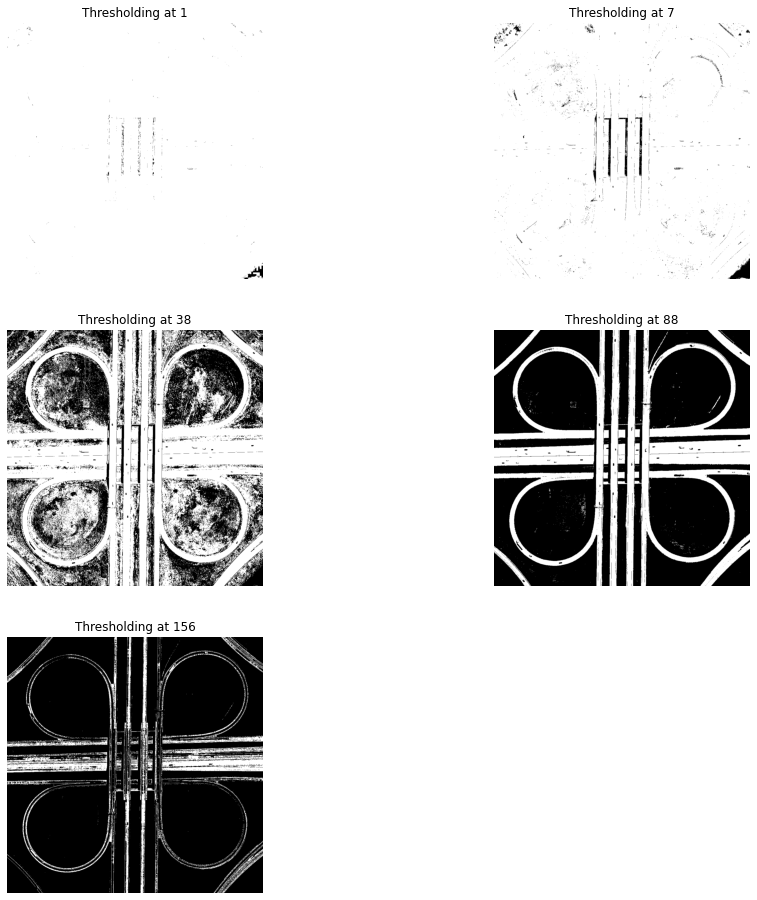

In [107]:
arr=[1,7,38,88,156]
bb=[]
cc=[]
for i in range(len(arr)):
    bb.append(thresholding(roads.img,arr[i]))
    cc.append("Thresholding at "+ str(arr[i]))
ss.print_img_subplot(3,2,[16,16],5,bb,cc)

## part 1

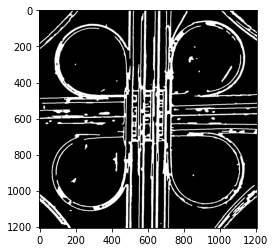

In [108]:
e_img=cv2.Canny(roads.img,100,550)
ee_img=erosion(e_img,5,5,1)
ed_img=dilate(e_img,5,5,1)
e_img=cv2.medianBlur(ed_img-ee_img,9)
plt.imshow(e_img,cmap="gray")
plt.show()

In [109]:
def houghLine(image):
    Ny = image.shape[0]
    Nx = image.shape[1]
    Maxdist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))
    thetas = np.deg2rad(np.arange(-10,10,1))
    rs = np.linspace(-Maxdist, Maxdist, 2*Maxdist)
    accumulator = np.zeros((2 * Maxdist, len(thetas)))
    for y in range(Ny):
        for x in range(Nx):
            if image[y,x] > 0:
                for k in range(len(thetas)):
                    r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])
                    accumulator[int(r) + Maxdist,k] += 1
    return accumulator, thetas, rs

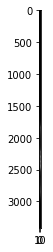

In [110]:
accumulator, thetas, rhos = houghLine(e_img)
plt.imshow(accumulator,cmap="gray")
plt.show()

In [111]:
idx = np.argmax(accumulator)
rho = int(rhos[int(idx / accumulator.shape[1])])
theta = thetas[int(idx % accumulator.shape[1])]
print("rho={0:.0f}, theta={1:.0f}".format(rho, np.rad2deg(theta)))

rho=665, theta=1


In [112]:
pp=[]
for i in range(accumulator.shape[0]):
    for j in range(accumulator.shape[1]):
        if accumulator[i][j]!=0:
            pp.append((accumulator[i][j],i,j))
gg=sorted(pp,key=lambda x:x[0],reverse=True)

In [113]:
dic=[]
for k in range(len(pp)):
    fl=False
    for i in range(accumulator.shape[0]):
        if fl==True:
            break
        for j in range(accumulator.shape[1]):
            if fl==True:
                break
            if accumulator[i][j]==gg[k][0]:
                if [rhos[gg[k][1]],thetas[gg[k][2]]] not in dic:
                    dic.append([rhos[gg[k][1]],thetas[gg[k][2]]])
                    fl = True

In [114]:
print(len(dic))
df = pd.DataFrame(dic[:100], columns =['Rho', 'Theta'])
px.scatter(df,"Rho","Theta")

25571


In [115]:
arr=[]
arr.append((524,0.01745329))
arr.append((570,0.01745329))
arr.append((591,0.01745329))
arr.append((644,0.01745329))
arr.append((670,0.01745329))
arr.append((710,0.01745329))
arr.append((738,0.01745329))

arr.append((698,-0.01745329))
arr.append((717,-0.01745329))

arr.append((503,0))
arr.append((583,0))
arr.append((660,0))
arr.append((702,0))
arr.append((720,0))

arr.append((726,0.03490659))
arr.append((730,0.03490659))

arr.append((732,0.05235988))


In [116]:
def hough_lines_draw(img, arr,pr=False):
    dela=[]
    bela=[]
    imga = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for x in range(len(arr)):
        if arr[x][1]==0:
            a = np.cos(arr[x][1])
            b = np.sin(arr[x][1])
            rho=arr[x][0]
            sx=rho
            sy=0
            ex=rho
            ey=0
            imga = cv2.line(imga, (int(sx),int(sy)),(int(ex),int(ey)), (255,255,255), 5)
        else:
            a = np.cos(arr[x][1])
            b = np.sin(arr[x][1])
            rho=arr[x][0]
            sx=rho/a
            sy=0
            ex=0
            ey=rho/b
            imga = cv2.line(imga, (int(sx),int(sy)),(int(ex),int(ey)), (255,255,255), 5)
        if pr:
            plt.imshow(imga)
            plt.show()
        dela.append(np.copy(imga))
        bela.append(arr[x])
    return dela,bela

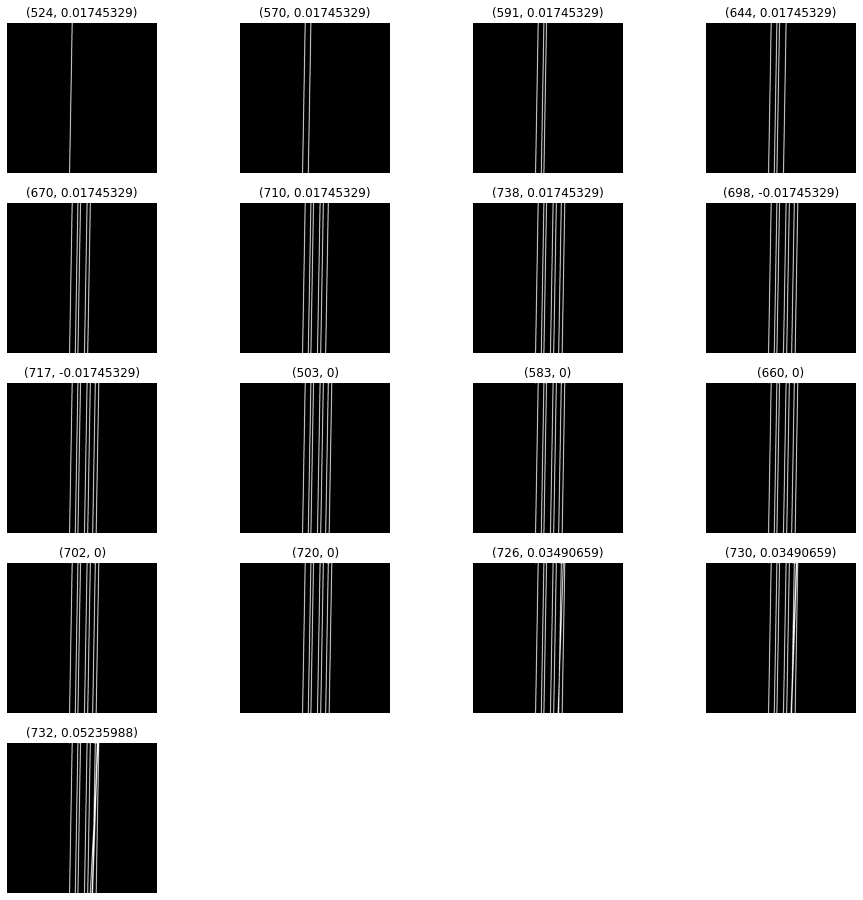

In [117]:
aa,bb=hough_lines_draw(e_img,arr)
ss.print_img_subplot(5,4,[16,16],17,aa,bb)

In [118]:
def hough_lines_draw2(img,imgaa ,arr,pr=False):
    dela=[]
    bela=[]
    temp = np.zeros(img.shape)
    imga = np.copy(imgaa)
    for x in range(len(arr)):
        if arr[x][1]==0:
            a = np.cos(arr[x][1])
            b = np.sin(arr[x][1])
            rho=arr[x][0]
            sx=rho
            sy=0
            ex=rho
            ey=0
            imga = cv2.line(imga, (int(sx),int(sy)),(int(ex),int(ey)), (255,255,255), 5)
        else:
            a = np.cos(arr[x][1])
            b = np.sin(arr[x][1])
            rho=arr[x][0]
            sx=rho/a
            sy=0
            ex=0
            ey=rho/b
            imga = cv2.line(imga, (int(sx),int(sy)),(int(ex),int(ey)), (255,0,0), 5)
        if pr:
            plt.imshow(imga)
            plt.show()
        dela.append(np.copy(imga))
        bela.append(arr[x])
    return dela,bela

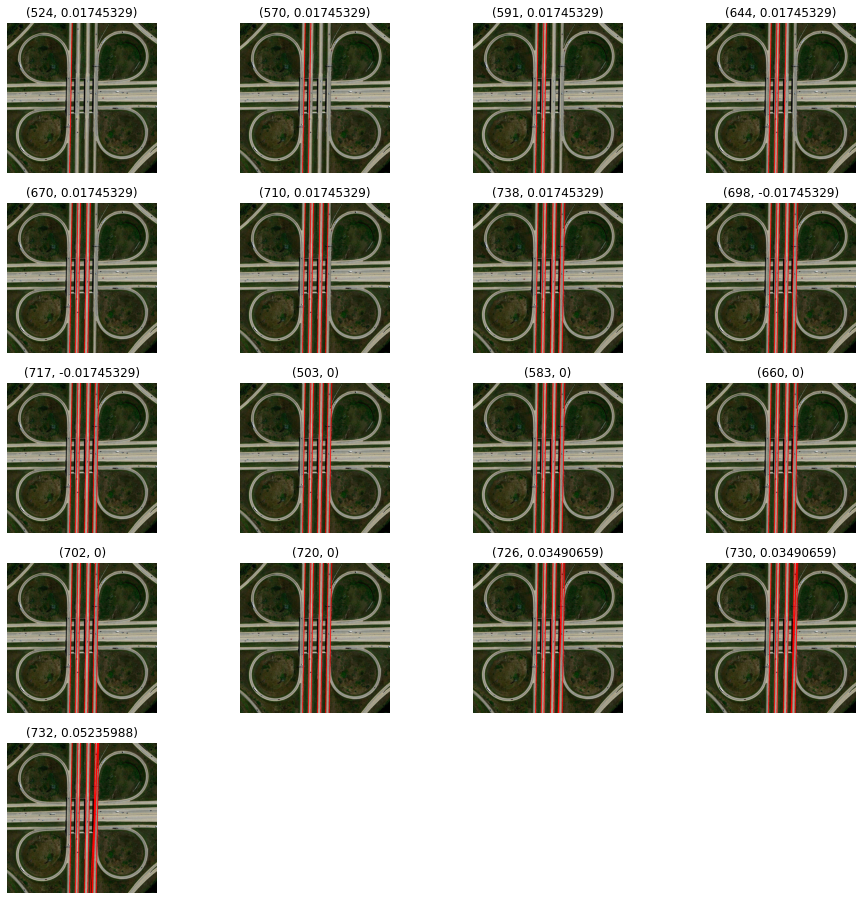

In [119]:
aa,bb=hough_lines_draw2(e_img,roads_in,arr)
ss.print_img_subplot(5,4,[16,16],17,aa,bb)

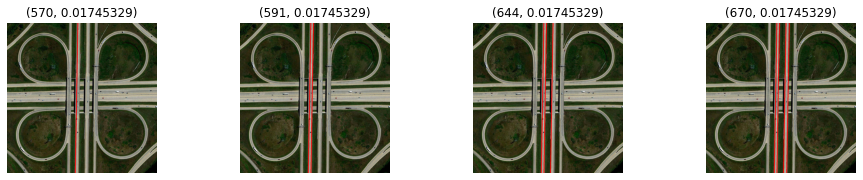

In [120]:
arr=[]
arr.append((570,0.01745329))
arr.append((591,0.01745329))
arr.append((644,0.01745329))
arr.append((670,0.01745329))
aa,bb=hough_lines_draw2(e_img,roads_in,arr)
ss.print_img_subplot(5,4,[16,16],len(arr),aa,bb)

### Final answer

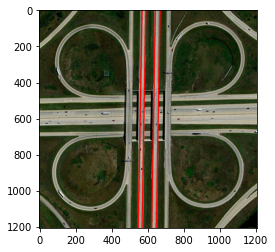

In [121]:

plt.imshow(aa[len(aa)-1],cmap="gray")
plt.show()

## part 2

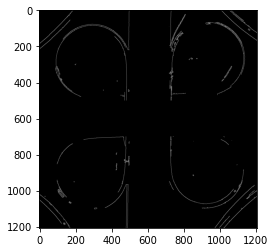

In [122]:
e_img=cv2.Canny(roads.img,200,700)
for i in range(e_img.shape[0]):
    for j in range(e_img.shape[1]):
        if (j>500 and j<720) or (i>500 and i<700):
            e_img[i][j]=0
plt.imshow(e_img,cmap="gray")
plt.grid(False)
plt.show()

In [123]:
def hough_circle(img,min=180,max=220):
    bb=[]
    ax=[]
    for r in range(min,max):
        arr=np.zeros(img.shape)
        e_img=cv2.Canny(img,254,655)
        for i in range(e_img.shape[0]):
            for j in range(e_img.shape[1]):
                if e_img[i,j]>0:
                    for theta in range(0,360):
                        x=int(i+r*np.cos(theta))
                        y=int(j+r*np.sin(theta))
                        if x>=0 and x<e_img.shape[0] and y>=0 and y<e_img.shape[1]:
                            arr[x,y]+=1
        bb.append(arr)
        ax.append("Radius in pixel: "+str(r))
    ss=Subplot()
    ss.print_img_subplot(5,8,[16,16],len(bb),bb,ax)
    return bb

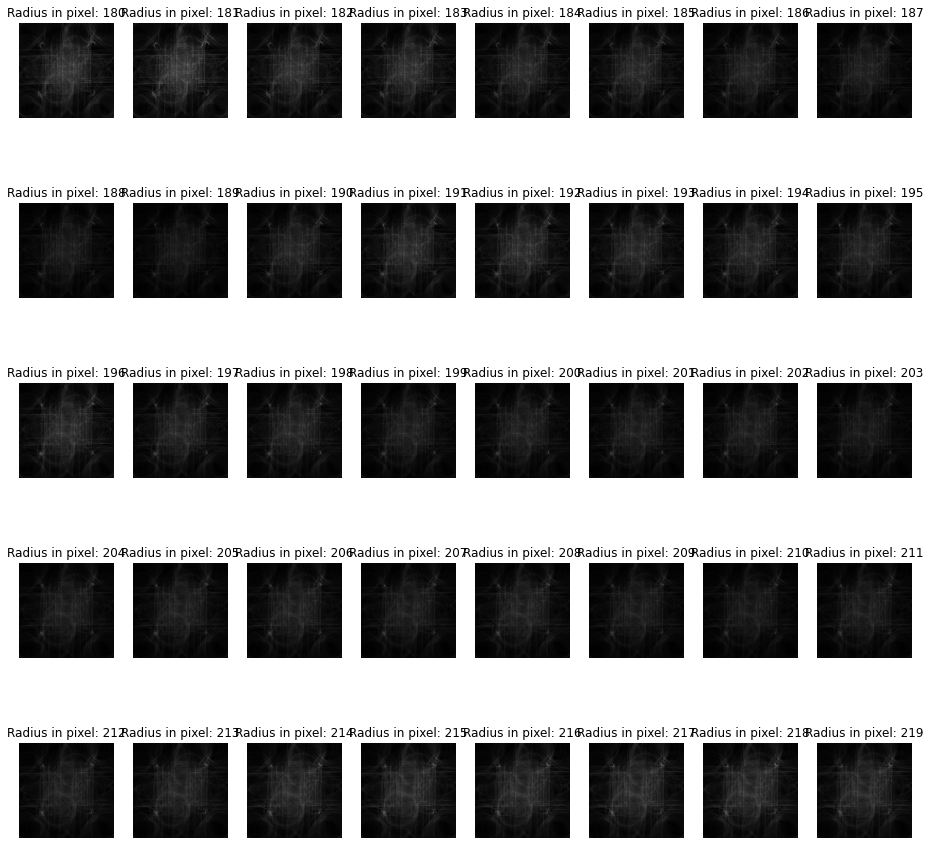

In [124]:
b=hough_circle(roads.img)

In [125]:
a=[np.max(i) for i in b]
print(180+a.index(max(a)))
main_arr=b[a.index(max(a))]

189


In [126]:
aa=unravel_index(main_arr.argmax(), main_arr.shape)

### Final answer

Radius in pixel: 189
Center of circles: [(899, 283), (283, 293), (273, 930), (890, 930)]


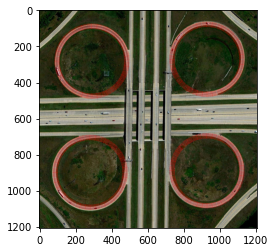

In [127]:
arr=[]
arr.append(aa)
arr.append((283,293))
arr.append((273,930))
arr.append((890,930))
t=180+a.index(max(a))
print("Radius in pixel:",t)
print("Center of circles:",arr)
ba=np.copy(roads_in)
for cc in arr:
    for r in range(t-10,t+20):
        for theta in range(0,360):
            x=int(cc[0]+r*np.cos(theta))
            y=int(cc[1]+r*np.sin(theta))
            if x>=0 and x<roads_in.shape[0] and y>=0 and y<roads_in.shape[1]:
                x=math.floor(x)
                y=math.floor(y)
                ba[x][y][0]=255
                ba[x][y][1]=0
                ba[x][y][2]=0
plt.imshow(ba)
plt.grid(False)
plt.show()

## part 3

In [128]:
def dfs2(i,j,img,vis):
    global ctr
    if(i<0 or i>=img.shape[0] or j<0 or j>=img.shape[1] or vis[i][j]==1 or img[i][j]==0):
        return
    else:
        vis[i][j]=1
        if img[i][j]!=0:
            dfs2(i+1,j,img,vis)
            dfs2(i-1,j,img,vis)
            dfs2(i,j+1,img,vis)
            dfs2(i,j-1,img,vis)
            dfs2(i+1,j+1,img,vis)
            dfs2(i-1,j-1,img,vis)
            dfs2(i-1,j+1,img,vis)
            dfs2(i+1,j-1,img,vis)
def fl(a,b,c,d):
    if (a<0 or a>=c or b<0 or b>=d):
        return False
    return True
def dfs22(i,j,img,re,vis,c):
    global ctr
    if(i<0 or i>=img.shape[0] or j<0 or j>=img.shape[1] or vis[i][j]==1 or img[i][j]==0):
        return 1
    else:
        vis[i][j]=1
        re[i][j]=c
        vall=0
        if img[i][j]!=0:
            if fl(i+1,j,img.shape[0],img.shape[1]) and img[i+1][j]!=1:
                vall+=dfs22(i+1,j,img,re,vis,c)
            if fl(i-1,j,img.shape[0],img.shape[1]) and img[i-1][j]!=1:
                vall+=dfs22(i-1,j,img,re,vis,c)
            if fl(i,j+1,img.shape[0],img.shape[1]) and img[i][j+1]!=1:
                vall+=dfs22(i,j+1,img,re,vis,c)
            if fl(i,j-1,img.shape[0],img.shape[1]) and img[i][j-1]!=1:
                vall+=dfs22(i,j+1,img,re,vis,c)
            if fl(i+1,j+1,img.shape[0],img.shape[1]) and img[i+1][j+1]!=1:
                vall+=dfs22(i+1,j+1,img,re,vis,c)
            if fl(i-1,j-1,img.shape[0],img.shape[1]) and img[i-1][j-1]!=1:
                vall+=dfs22(i-1,j-1,img,re,vis,c)
            if fl(i-1,j+1,img.shape[0],img.shape[1]) and img[i-1][j+1]!=1:
                vall+=dfs22(i-1,j+1,img,re,vis,c)
            if fl(i+1,j-1,img.shape[0],img.shape[1]) and img[i+1][j-1]!=1:
                vall+=dfs22(i+1,j+1,img,re,vis,c)
            # print(vall)
        if vall >10000:
            vall=-1
        return vall
    

def count_obj(img,co=255):
    cc = 0
    vi = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if vi[i][j]==0 and img[i][j]==co:
                dfs2(i,j,img,vi)
                cc+=1
    return cc

def count_obj2(img,co=255):
    cc = 1
    dd = []
    re = np.zeros((img.shape[0],img.shape[1]))
    vi = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if vi[i][j]==0 and img[i][j]!=1:
                kkk=[]
                kkk.append(dfs22(i,j,img,re,vi,cc))
                kkk.append(cc-1)
                dd.append(kkk)
                cc+=1
    return cc-1,dd,re


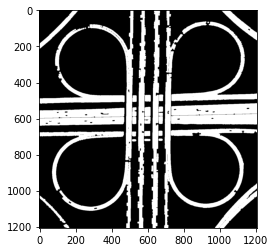

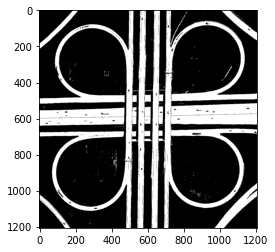

In [129]:
ims=thresholding(roads.img,88)
imk=erosion(ims,5,5,2)
imk=dilate(imk,5,5,2)
plt.imshow(imk,cmap="gray")
plt.show()
plt.imshow(ims,cmap="gray")
plt.show()


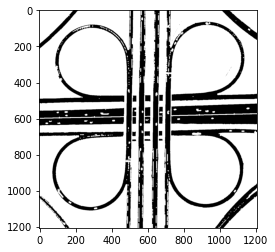

In [130]:
imsi = 255 - ims
imsi=dilate(imsi,3,3,2)
plt.imshow(imsi,cmap="gray")
plt.show()


In [131]:
for i in range(imsi.shape[0]):
    for j in range(imsi.shape[1]):
        if i==100 or i==1100 or j==100 or j==1100:
            imsi[i][j]=255

In [132]:
colors = []
for i in range(300):
    colors.append([random.randint(0,255),random.randint(0,255),random.randint(0,255)])

def LaberOrdering(image):
    result_img = np.zeros(image.shape)
    ord_ = {}
    n = image.shape[0]
    m = image.shape[1]
    uniques = np.unique(image)
    for i in range(len(uniques)):
        ord_[uniques[i]] = i
    
    for i in range(n):
        for j in range(m):
            result_img[i][j] = ord_[image[i][j]]
    
    return result_img

def add_color(image):
    global colors
    new_image = np.zeros((image.shape[0], image.shape[1], 3))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if  image[i][j]:
                new_image[i][j] = colors[image[i][j]]
    return new_image.astype(np.uint8)

def one_th_Pass_comp(image, k):
    parent_lst = {0:0} 
    count = 0 
    result_img = np.zeros(image.shape)
    for i in range(k, image.shape[0] - k):
        for j in range(k, image.shape[1] - k):
            neighbours = []
            cur = 0
            if image[i][j]:
                if result_img[i][j-1]:
                    neighbours.append(result_img[i][j-1])
                if result_img[i-1][j]:
                    neighbours.append(result_img[i-1][j])
                neighbours = np.array(neighbours)
                if len(neighbours) == 0:
                    count = count + 1
                    cur = count
                elif result_img[i][j-1] == result_img[i-1][j] :
                    cur = neighbours[0]
                else:
                    for k in range(len(neighbours)):
                        neighbour = neighbours[k]
                        if neighbour in parent_lst:
                            if parent_lst[neighbour] < min(neighbours):
                                parent_lst[neighbour] = parent_lst[neighbour]
                            else:
                                parent_lst[neighbour] = min(neighbours)
                        else:
                            parent_lst[neighbour] = min(neighbours)
                    cur = min(neighbours)
                result_img[i][j] = cur
    # plt.imshow(result_img)
    # plt.show()
    return result_img, parent_lst

def connected_component(img, k):
    kk = k//2
    first = np.copy(img)
    first, parent_lst = one_th_Pass_comp(img, kk)
    second = np.zeros(first.shape)
    for i in range(kk, img.shape[0] - kk):
        for j in range(kk, img.shape[1] - kk):
            cd = first[i][j]
            while parent_lst[cd] != cd and cd in parent_lst:
                cd = parent_lst[cd]
            second[i][j] = cd
    second = LaberOrdering(second)
    second=np.array(second[kk:img.shape[0]-kk, kk:img.shape[1]-kk]).astype(np.uint8)
    return second,add_color(second)

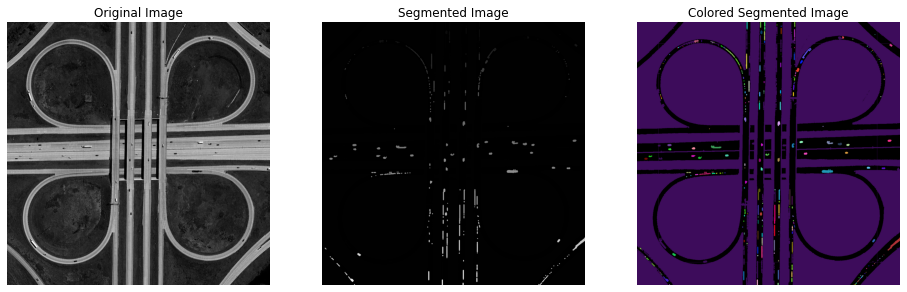

In [133]:
new_img,colored_img = connected_component(imsi, 5)
ss.print_img_subplot(1,3,[16,16],3,[roads.img,new_img,colored_img],["Original Image","Segmented Image","Colored Segmented Image"])


In [134]:
his=my_histogram(new_img)

In [135]:
px.line(his[2:])

[29, 103, 121]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


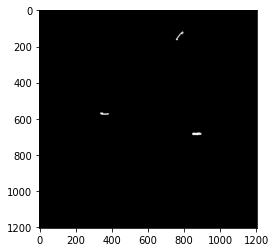

In [136]:
aaa=[]
aab=[]
axx=[441]
for i in range(2,len(his)):
    if his[i]>390 and his[i]<690 and his[i] not in axx:
        aaa.append(i)
print(aaa)
zz=np.zeros(colored_img.shape)
for k in aaa:
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            if new_img[i][j]==k:
                zz[i][j]=[255,255,255]
plt.imshow(zz)
plt.show()

### Final answer

Number of trailers: 3


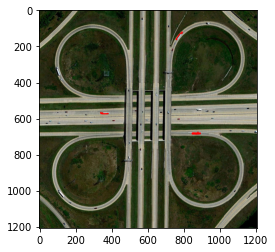

In [137]:
print("Number of trailers:",len(aaa))
aa=np.copy(roads_in)
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        if new_img[i][j] in aaa:
            aa[i][j]=[255,0,0]
plt.imshow(aa)
plt.show()

# Question 5

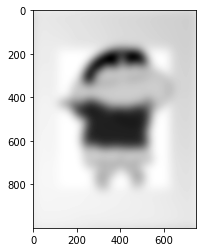

In [138]:
shinchan_blur=Image()
shinchan_blur.read_local_img('../images/shinchan_blur.png')
shinchan_blur.img=cv2.cvtColor(shinchan_blur.img,cv2.COLOR_BGR2GRAY)
gk=np.copy(shinchan_blur.img)
plt.imshow(shinchan_blur.img,cmap="gray")
plt.show()
ggk=cv2.resize(shinchan_blur.img,(512,512))


In [139]:
Ga,Gam=apply(shinchan_blur.img,None,512,512,"Magnitude of img",True,True)

## Part 1

In [140]:
def psf_ker(k1,k2,s):
    arr=np.zeros((k1,k2))
    for i in range(k1):
        for j in range(k2):
            arr[i][j]=1/(2*np.pi*s**2)*np.exp(-(((i-((k1+1)//2))**2+(j-((k2+1)//2))**2)/(2*s**2)))
    return arr

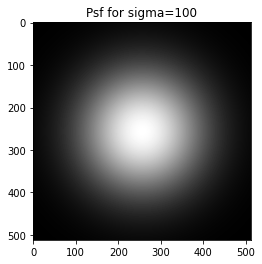

In [141]:
h=psf_ker(512,512,100)
plt.imshow(h,cmap="gray")
plt.title("Psf for sigma=100")
plt.show()

## Part 2

In [142]:
def repair_psf(n,m,sigma,Ga,Gam,img,lam=0):
    Ha,Ham=apply(psf_ker(n,m,sigma),None,512,512,"magnitude of psf kernel",True,True)
    No=np.zeros((n,m),dtype=complex)
    No.fill(1e-24+1e-024j)
    Fa=(Ga/(Ha+((1e-02 + 1e-02j))))
    ff=sfiff_2d(Fa)
    ff=fftshift(ff)
    ss.print_img_subplot(1,5,[16,16],5,[Gam,Ha.real,Fa.real,ff.real,img],["magnitude of img","magnitude of psf kernel","magnitude of f_dash","Repaired Image (f_dash)","Original"])
    plt.show()
    return ff

## part 3

1


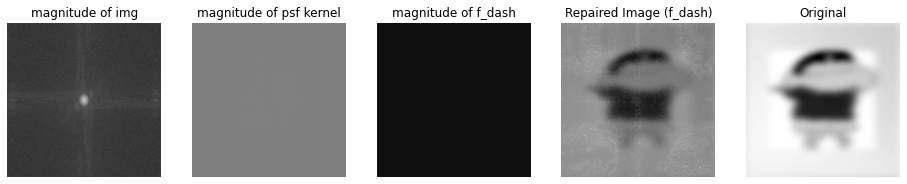

2


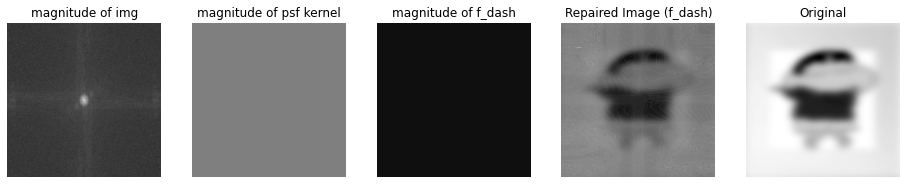

3


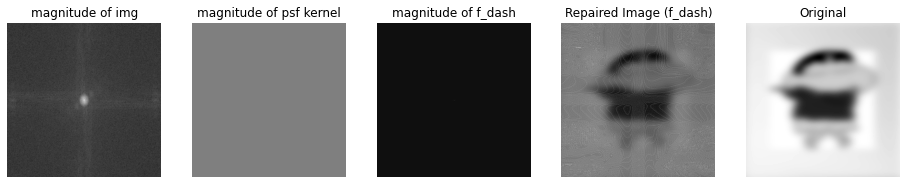

4


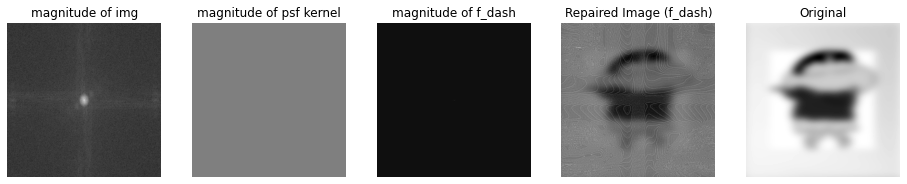

5


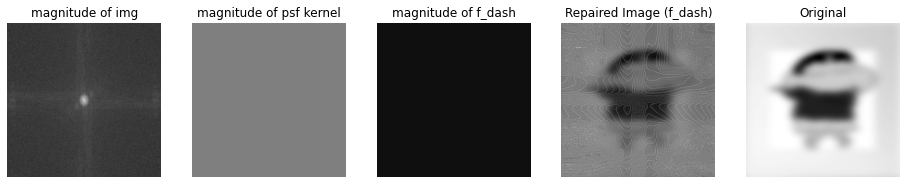

6


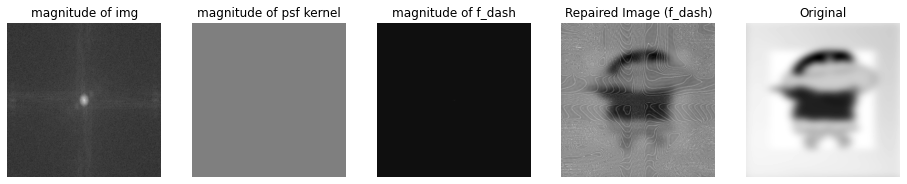

7


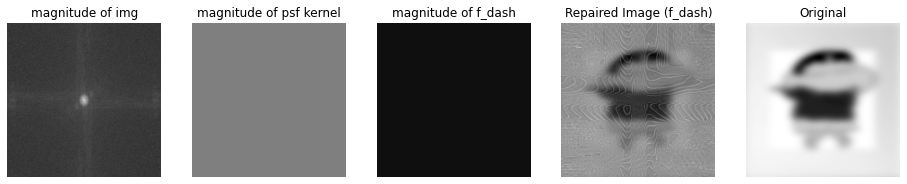

8


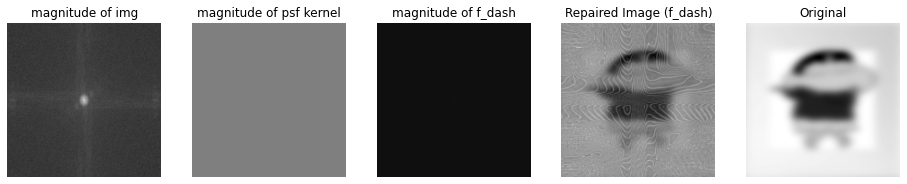

9


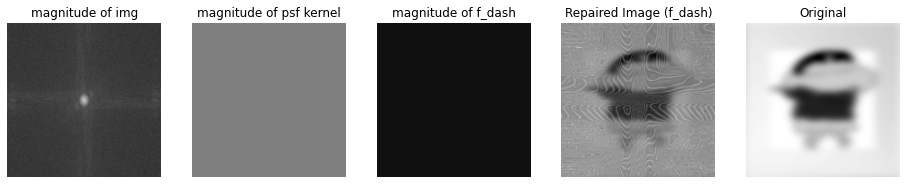

10


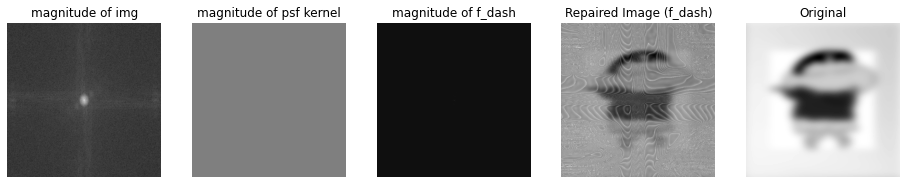

11


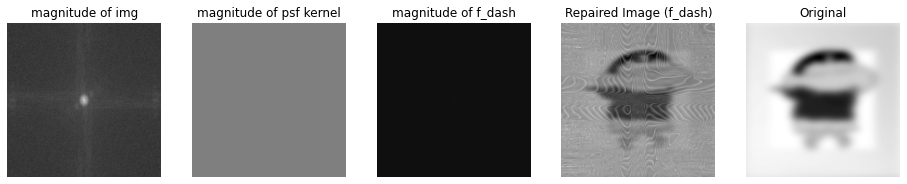

12


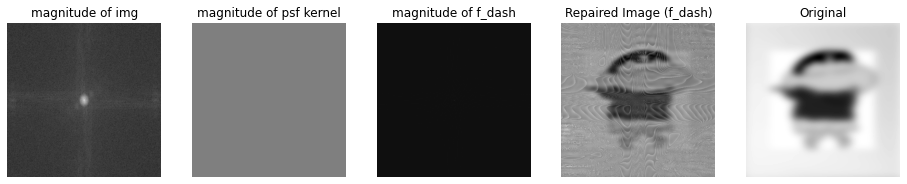

13


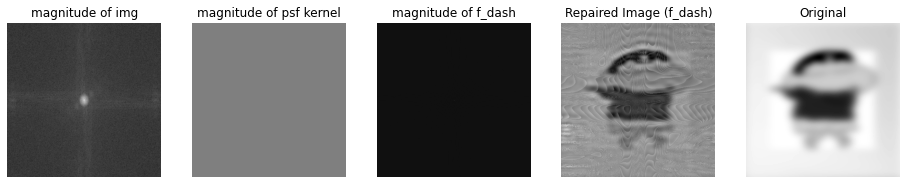

14


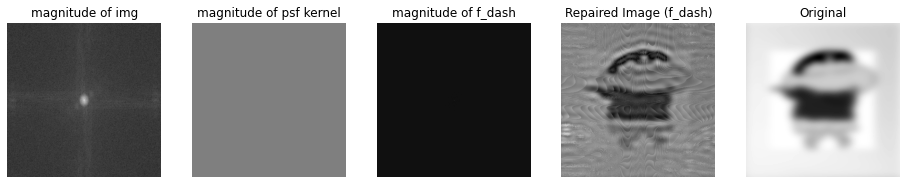

15


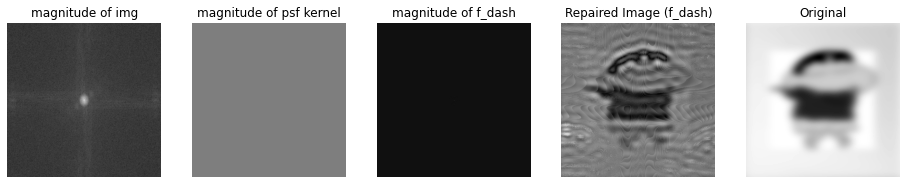

16


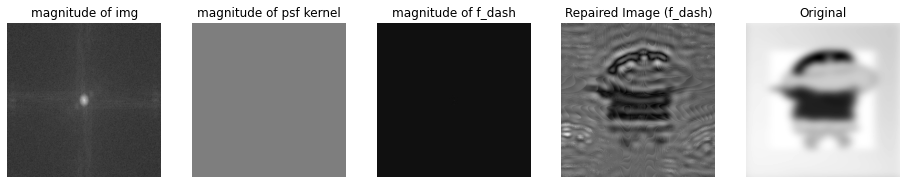

17


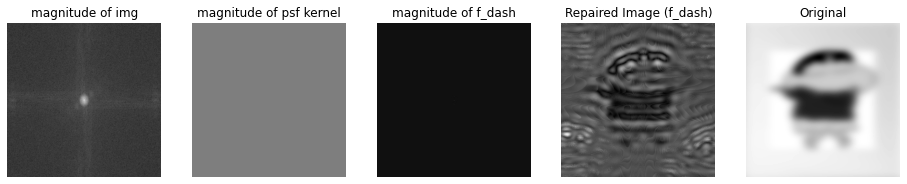

18


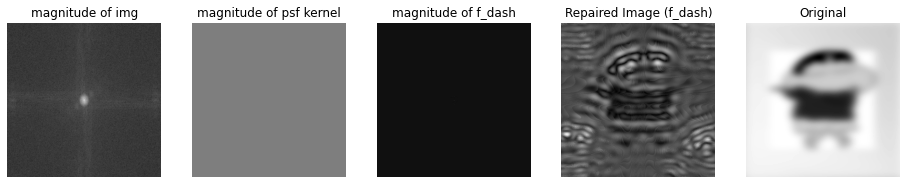

19


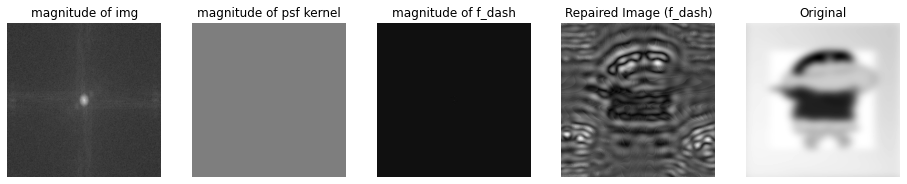

In [143]:
for i in range(1,20,1):
    print(i)
    repair_psf(512,512,i,Ga,Gam,ggk)

## part 4

### best but with noise

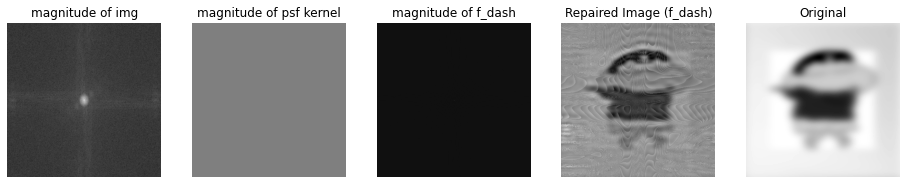

In [145]:
bs=13
img=repair_psf(512,512,bs,Ga,Gam,ggk)

### best but with less noise

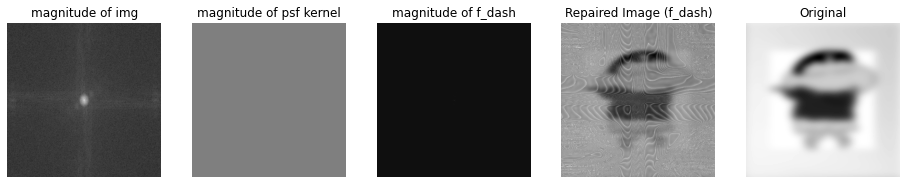

In [146]:
bs=10
img=repair_psf(512,512,bs,Ga,Gam,ggk)

### almost no noise

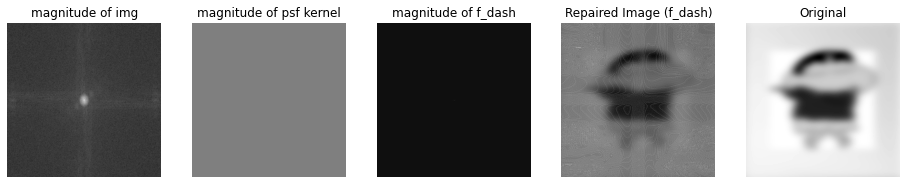

In [147]:
bs=3
img=repair_psf(512,512,bs,Ga,Gam,ggk)